In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import numpy as np
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix

In [2]:
dataset = pd.read_csv("Iris.csv")  
dataset.shape

(150, 6)

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:>

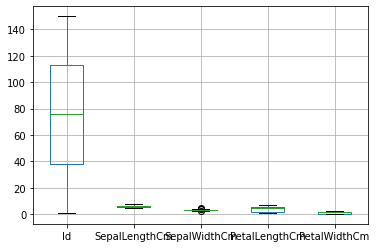

In [5]:
dataset.boxplot()

<AxesSubplot:>

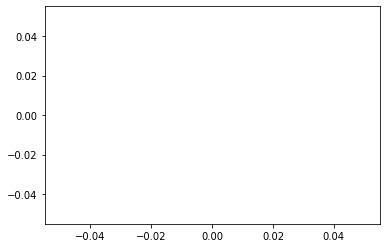

In [6]:
import seaborn as sns
sns.distplot()

In [7]:
numeric_cols = list(dataset.drop(['Species'],axis=1).columns)
print(numeric_cols)
z = np.abs(zscore(dataset[numeric_cols]))
threshold = 3 
dataset = dataset[(z<=3).all(axis = 1)]


['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [8]:
X = dataset.drop(['Id','Species'],axis = 1)
y = dataset['Species']
scaler = StandardScaler()
X = scaler.fit_transform(X)
data_X = pd.DataFrame(X,columns = ['SL','SW','PL','PW'])
data_X.head()

,SL,SW,PL,PW
0,-0.898927,1.085374,-1.352896,-1.320511
1,-1.140478,-0.107257,-1.352896,-1.320511
2,-1.382029,0.369796,-1.409888,-1.320511
3,-1.502804,0.131269,-1.295904,-1.320511
4,-1.019702,1.323900,-1.352896,-1.320511


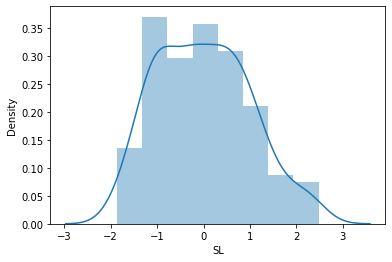

In [9]:
sns.distplot(data_X['SL'])
plt.show()

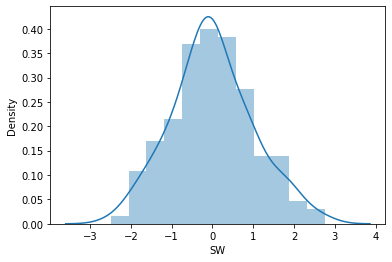

In [10]:
sns.distplot(data_X['SW'])
plt.show()

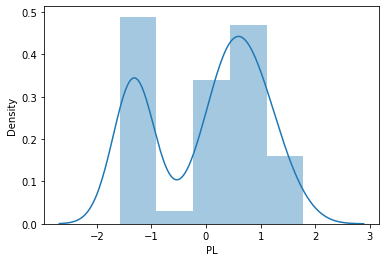

In [11]:
sns.distplot(data_X['PL'])
plt.show()

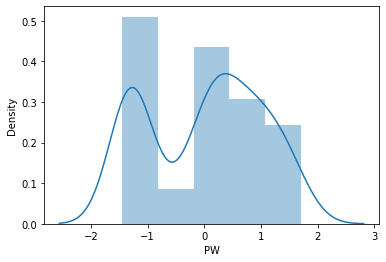

In [12]:
sns.distplot(data_X['PW'])
plt.show()

In [13]:
y.shape

(149,)

In [14]:
X.shape

(149, 4)

In [15]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = .3, random_state = 42)

In [16]:

y_train

82     Iris-versicolor
133     Iris-virginica
143     Iris-virginica
76     Iris-versicolor
109     Iris-virginica
            ...       
72     Iris-versicolor
107     Iris-virginica
14         Iris-setosa
93     Iris-versicolor
103     Iris-virginica
Name: Species, Length: 104, dtype: object

In [17]:
gnb_model = GaussianNB()

In [18]:
gnb_model.fit(X_train,y_train)
prediction = gnb_model.predict(X_test)

In [19]:
labels = ['Iris-setosa','Iris-versicolor', 'Iris-virginica']

In [20]:
from sklearn.metrics import classification_report
nb_acc = accuracy_score(prediction,y_test)
nb_precision = precision_score(prediction,y_test,average = 'macro')
nb_recall = recall_score(prediction,y_test,average = 'macro')
nb_f1_score = f1_score(prediction,y_test,average = 'macro')
cm = confusion_matrix(y_test,prediction,labels = labels)
cm_df = pd.DataFrame(cm,index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
print(classification_report(y_test,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.89      0.62      0.73        13
 Iris-virginica       0.71      0.92      0.80        13

       accuracy                           0.87        45
      macro avg       0.86      0.85      0.84        45
   weighted avg       0.88      0.87      0.86        45



In [21]:
print("Accuracy score: ",nb_acc)
print("Precision score: ",nb_precision)
print("Recall: ",nb_recall)
print("f1 score: ",nb_f1_score)


Accuracy score:  0.8666666666666667
Precision score:  0.8461538461538461
Recall:  0.8649237472766885
f1 score:  0.8424242424242426


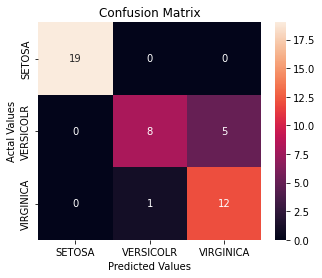

In [22]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
